<a href="https://colab.research.google.com/github/YuvanBharathi13/DeepLearning/blob/main/02_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Classification with Neural Networks in TensorFlow

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Creating data to view and fit  

In [2]:
from sklearn.datasets import make_circles

X,y = make_circles(n_samples=1000, noise=0.03, random_state=42)

In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
X.shape

(1000, 2)

In [5]:
np.get_printoptions()

{'edgeitems': 3,
 'threshold': 1000,
 'floatmode': 'maxprec',
 'precision': 8,
 'suppress': False,
 'linewidth': 75,
 'nanstr': 'nan',
 'infstr': 'inf',
 'sign': '-',
 'formatter': None,
 'legacy': False}

In [6]:
np.set_printoptions(threshold=100)

In [7]:
np.get_printoptions()

{'edgeitems': 3,
 'threshold': 100,
 'floatmode': 'maxprec',
 'precision': 8,
 'suppress': False,
 'linewidth': 75,
 'nanstr': 'nan',
 'infstr': 'inf',
 'sign': '-',
 'formatter': None,
 'legacy': False}

In [8]:
y # Binary Classification problem

array([1, 1, 1, ..., 1, 0, 0])

In [9]:
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


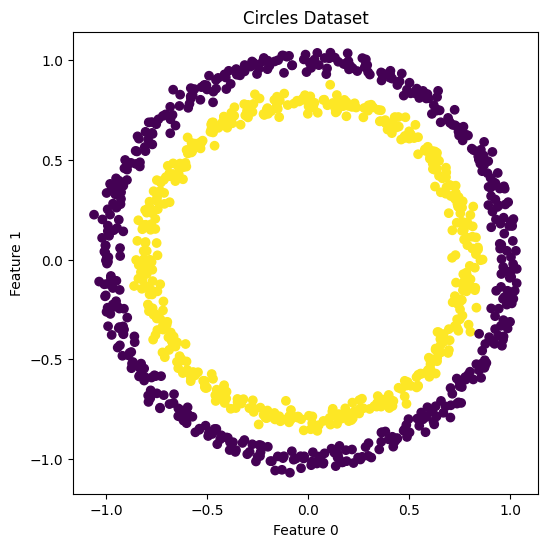

In [10]:
plt.figure(figsize=(6,6))
plt.scatter(circles['X0'],circles['X1'],c=circles['label'])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Circles Dataset")
plt.show()

* The two indpendent features are nothing but coordinates on the x and y axis. based on their distance from the centre they are classified as 1 and 0.

## Input and Output Shapes

In [11]:

X.shape, y.shape

((1000, 2), (1000,))

## Building the model

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Creating a model without any non-linear activation function and using SGD as the optimizer

In [13]:
# Setting the seed
tf.random.set_seed(42)

# Creating the model
model1 = tf.keras.Sequential([
    tf.keras.Input((2,)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compiling the model
model1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
           optimizer = tf.keras.optimizers.SGD(),
           metrics = ['accuracy'])

# Fitting the model
model1.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5064 - loss: 3.0053
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4767 - loss: 0.6960
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4591 - loss: 0.6958
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4541 - loss: 0.6958
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4563 - loss: 0.6958
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4563 - loss: 0.6958
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4563 - loss: 0.6958
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4563 - loss: 0.6958
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4563 - loss: 0.6958 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4563 - loss: 0.6958 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4563 - loss: 0.6958 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accura

In [14]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,323 (5.17 KB)

 Trainable params: 1,321 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [15]:
y_pred1 = model1.predict(X_test)
y_pred1

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[0.49665606],
       [0.50459373],
       [0.4772805 ],
       ...,
       [0.49544477],
       [0.48974788],
       [0.5038941 ]], dtype=float32)

In [16]:
model1.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.4210 - loss: 0.6971


[0.695420503616333, 0.45500001311302185]

### Creating a model without any non-linear activation function and using Adam as the optimizer

In [17]:
X_train.shape, y_train.shape

((800, 2), (800,))

In [18]:
# Setting the seed
tf.random.set_seed(42)

# Creating the model
model2 = tf.keras.Sequential([
    tf.keras.Input((2,)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compiling the model
model2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

# Fitting the model
model2.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5016 - loss: 3.3396
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4817 - loss: 0.7191
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4680 - loss: 0.6961
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5081 - loss: 0.6944
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4987 - loss: 0.6941
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4969 - loss: 0.6940
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4894 - loss: 0.6942
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4902 - loss: 0.6942
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4899 - loss: 0.6943
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4888 - loss: 0.6944
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4880 - loss: 0.6945
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

In [19]:
model2.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4231 - loss: 0.7027


[0.6979584693908691, 0.46000000834465027]

In [20]:
y_pred2 = model2.predict(X_test)
y_pred2

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[0.52846694],
       [0.53979814],
       [0.4879024 ],
       ...,
       [0.49802876],
       [0.51775473],
       [0.532228  ]], dtype=float32)

In [21]:
def plot_decision_boundary(model, X, y):
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together:

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...


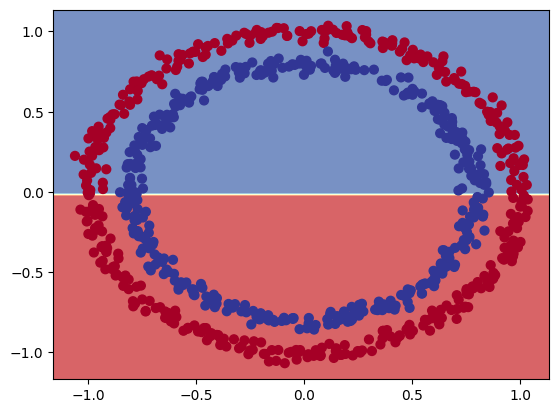

In [22]:
plot_decision_boundary(model2,X_train,y_train)

### Model with non-linearity and Adama optimzer

In [23]:
# Setting the seed
tf.random.set_seed(42)

# Creating the model
model3 = tf.keras.Sequential([
    tf.keras.Input((2,)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compiling the model
model3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

# Fitting the model
model3.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4518 - loss: 0.6977
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5025 - loss: 0.6894
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5025 - loss: 0.6866
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5025 - loss: 0.6842
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5025 - loss: 0.6815 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5025 - loss: 0.6779 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5038 - loss: 0.6740 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5177 - loss: 0.6688
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6312 - loss: 0.6614 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7172 - loss: 0.6499
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7772 - loss: 0.6359
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accur

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...


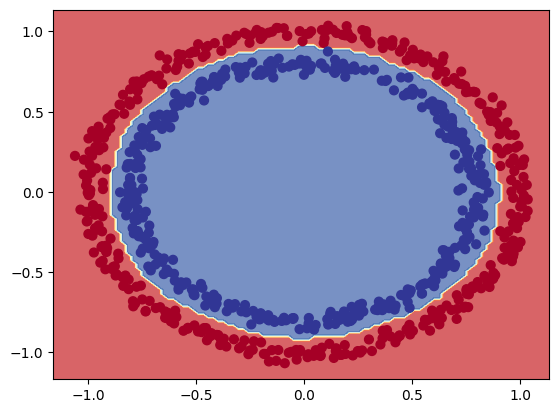

In [24]:
plot_decision_boundary(model3,X_train,y_train)

### 4*4 model with non-linearity but last neuron is LINEAR

In [25]:
# Setting the random seed
tf.random.set_seed(42)

# Creating the model
model4 = tf.keras.Sequential([
    tf.keras.Input((2,)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compiling the model
model4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

# Fitting the model
model4.fit(X_train,y_train,epochs=250)

Epoch 1/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5025 - loss: 8.0181
Epoch 2/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5025 - loss: 8.0181 
Epoch 3/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5025 - loss: 8.0181
Epoch 4/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5025 - loss: 8.0181
Epoch 5/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5025 - loss: 8.0181
Epoch 6/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5025 - loss: 8.0181
Epoch 7/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5025 - loss: 8.0181
Epoch 8/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5025 - loss: 8.0181
Epoch 9/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5025 - loss: 8.0181 
Epoch 10/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5025 - loss: 8.0181
Epoch 11/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5025 - loss: 8.0181
Epoch 12/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accurac

* CRAZY ouput. Accuracy is 98.93% but so much indecision. HOW ?  

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...


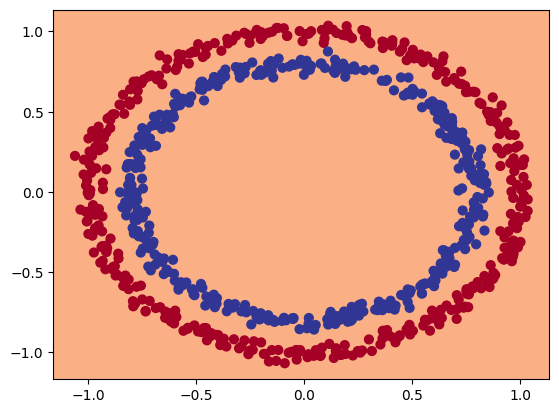

In [26]:
plot_decision_boundary(model4,X_train,y_train)

### Making the output neuron have ReLu

In [27]:
# settign the random seed
tf.random.set_seed(42)

# Creating the model
model5 = tf.keras.Sequential([
    tf.keras.Input((2,)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="relu")
])

# Compiling the model
model5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

# Fitting the model
model5.fit(X_train,y_train,epochs=250)

Epoch 1/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5025 - loss: 2.5892
Epoch 2/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5025 - loss: 1.2547
Epoch 3/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5025 - loss: 1.1555
Epoch 4/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5025 - loss: 1.0925
Epoch 5/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5025 - loss: 1.0438
Epoch 6/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5025 - loss: 1.0045
Epoch 7/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5025 - loss: 0.9721
Epoch 8/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5025 - loss: 0.9450
Epoch 9/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5025 - loss: 0.9223
Epoch 10/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5025 - loss: 0.9031
Epoch 11/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5025 - loss: 0.8867
Epoch 12/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...


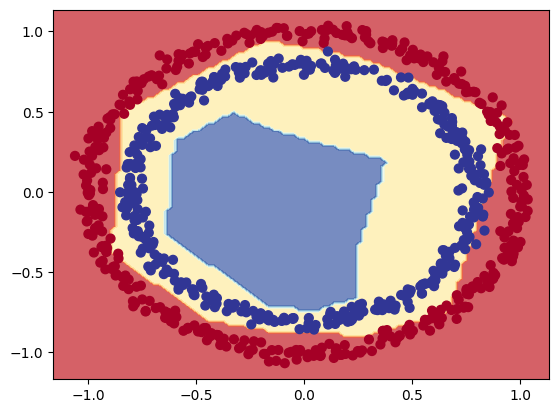

In [28]:
plot_decision_boundary(model5,X_train,y_train)

### Making the output neuron have Sigmoid

In [29]:
# settign the random seed
tf.random.set_seed(42)

# Creating the model
model6 = tf.keras.Sequential([
    tf.keras.Input((2,)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compiling the model
model6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

# Fitting the model
history6 = model6.fit(X_train,y_train,epochs=250)

Epoch 1/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5019 - loss: 0.6905
Epoch 2/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5141 - loss: 0.6891
Epoch 3/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5176 - loss: 0.6881
Epoch 4/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5396 - loss: 0.6873
Epoch 5/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5653 - loss: 0.6866
Epoch 6/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5517 - loss: 0.6859
Epoch 7/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5435 - loss: 0.6852
Epoch 8/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5480 - loss: 0.6844
Epoch 9/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5650 - loss: 0.6836
Epoch 10/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5730 - loss: 0.6829
Epoch 11/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5708 - loss: 0.6821
Epoch 12/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...


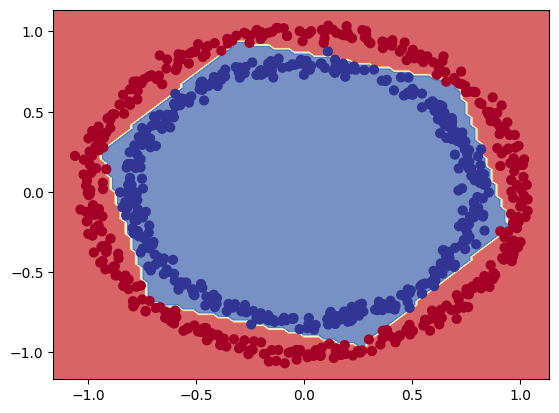

In [30]:
plot_decision_boundary(model6,X_train,y_train)

## Leraning rate Manipulation

In [31]:
# Same model as model6 but with a higher learning rate so the model can learn faster

In [32]:
# setting the seed
tf.random.set_seed(42)

# Creating the model
model7 = tf.keras.Sequential([
    tf.keras.Input((2,)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")])

# Compiling the model
model7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), # changing from default 0.001
               metrics = ['accuracy'])

# Fitting the model
history7 = model7.fit(X_train,y_train,epochs=50)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5147 - loss: 0.7075
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5120 - loss: 0.6864
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5338 - loss: 0.6797
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5353 - loss: 0.6719
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5470 - loss: 0.6622
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5648 - loss: 0.6489
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6235 - loss: 0.6307
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7061 - loss: 0.6061
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7467 - loss: 0.5741
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7658 - loss: 0.5301
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8019 - loss: 0.5026
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8180 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


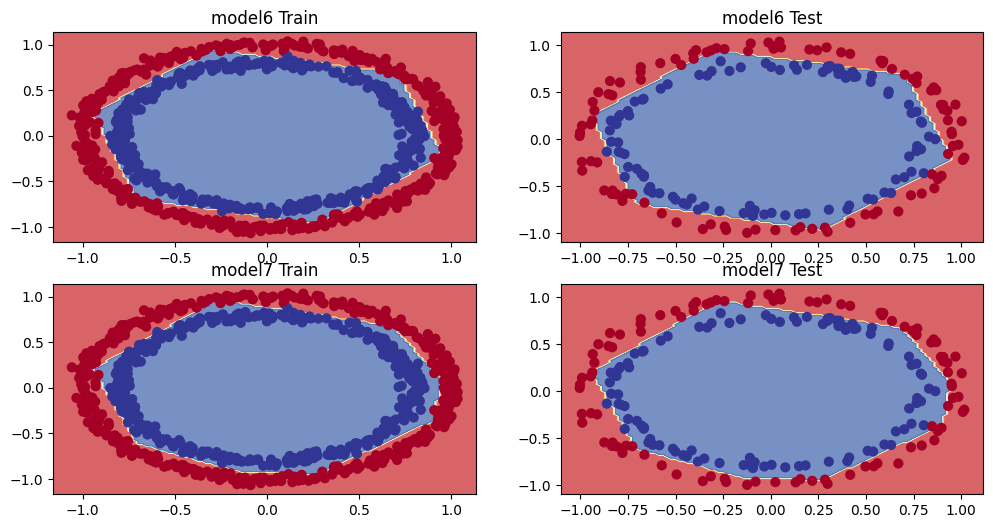

In [33]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.title("model6 Train")
plot_decision_boundary(model6, X=X_train, y=y_train)
plt.subplot(2, 2, 2)
plt.title("model6 Test")
plot_decision_boundary(model6, X=X_test, y=y_test)
plt.subplot(2, 2, 3)
plt.title("model7 Train")
plot_decision_boundary(model7, X=X_train, y=y_train)
plt.subplot(2, 2, 4)
plt.title("model7 Test")
plot_decision_boundary(model7, X=X_test, y=y_test)
plt.show()

In [34]:
model7.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9901 - loss: 0.0969


[0.11737170815467834, 0.9800000190734863]

### History of loss change (model6 vs model7)

Text(0.5, 1.0, 'Loss after epoch for model6')

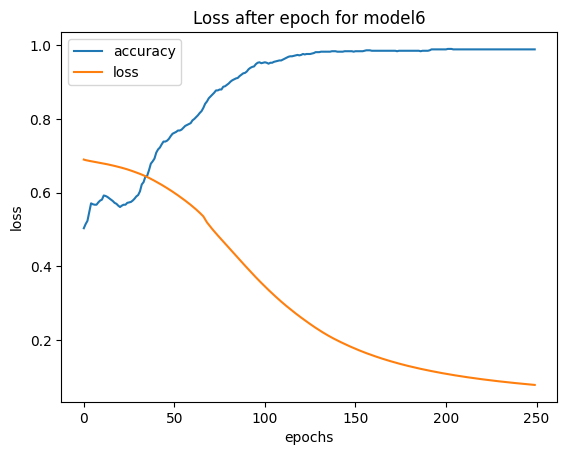

In [35]:
pd.DataFrame(history6.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.title("Loss after epoch for model6")

Text(0.5, 1.0, 'Loss after epoch for model7')

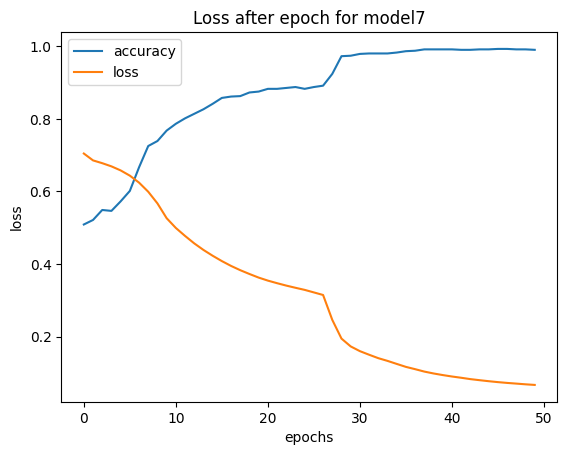

In [36]:
pd.DataFrame(history7.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
plt.title("Loss after epoch for model7")

In [42]:
df = pd.DataFrame(history7.history)
df.head(10)

,accuracy,loss
0,0.50875,0.704302
1,0.52125,0.685355
2,0.54875,0.677700
3,0.54625,0.668928
4,0.57250,0.657775
5,0.60125,0.643358
6,0.66625,0.624134
7,0.72500,0.598987
8,0.73875,0.566881
9,0.76750,0.526092


## Ideal Learning Rate

* A learning rate callback - You can think of a callback as an extra piece of functionality you can add to your model while its training.

In [43]:
# Set the random seed
tf.random.set_seed(42)

# Create the mdoel
model8 = tf.keras.Sequential([
    tf.keras.Input((2,)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")])

# Compile the model
model8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

# creating a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing in the lr_scheduler)
history8 = model8.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5022 - loss: 0.7423 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5043 - loss: 0.7408 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5001 - loss: 0.7392 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5009 - loss: 0.7375 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4924 - loss: 0.7357 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4859 - loss: 0.7337 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4809 - loss: 0.7317 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4812 - loss: 0.7297 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4696 - loss: 0.7275 - learning_

Text(0.5, 1.0, 'Loss after epoch for model8')

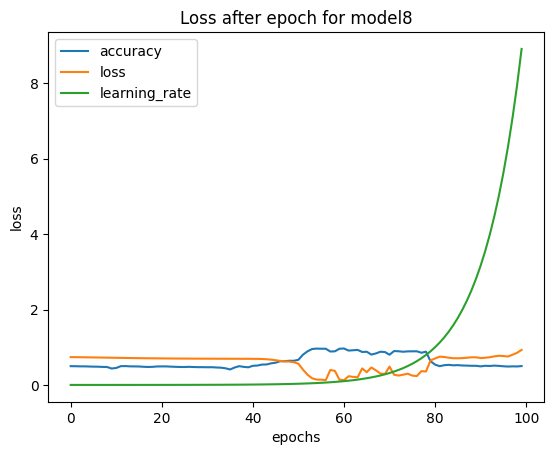

In [44]:
pd.DataFrame(history8.history).plot()
plt.ylabel("loss & accuracy & leraning rate")
plt.xlabel("epochs");
plt.title("Loss after epoch for model8")

In [45]:
# Learning rate vs loss
df8 = pd.DataFrame(history8.history)
df8

,accuracy,loss,learning_rate
0,0.49750,0.737837,0.000100
1,0.49625,0.736368,0.000112
2,0.49250,0.734798,0.000126
3,0.49250,0.733126,0.000141
4,0.48875,0.731369,0.000158
...,...,...,...
95,0.49500,0.765361,5.623413
96,0.48750,0.753526,6.309574
97,0.49250,0.800822,7.079458
98,0.49000,0.852261,7.943282


Text(0.5, 1.0, 'Learning Rate vs Loss')

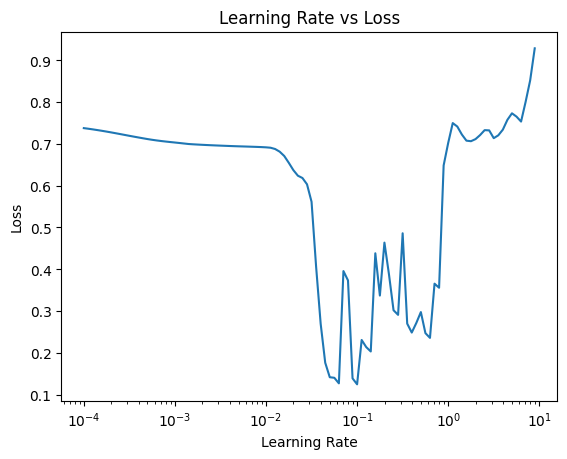

In [48]:
plt.semilogx(df8['learning_rate'],df8['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

* From the above graph we can clearly tell that the section of the graph where there is the steepest fall in the loss value is the best learning rate. In this case it happens to be **~ 0.01**.